In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Algorithm import Kmeans, get_2D_graph, scaler

In [2]:
df = pd.read_csv(r'C:\Users\mpiernicki\PycharmProjects\K_Means_Algorithm\DATA\Iris.csv')

In [3]:
df.drop(['Id','Species'], axis=1, inplace=True)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


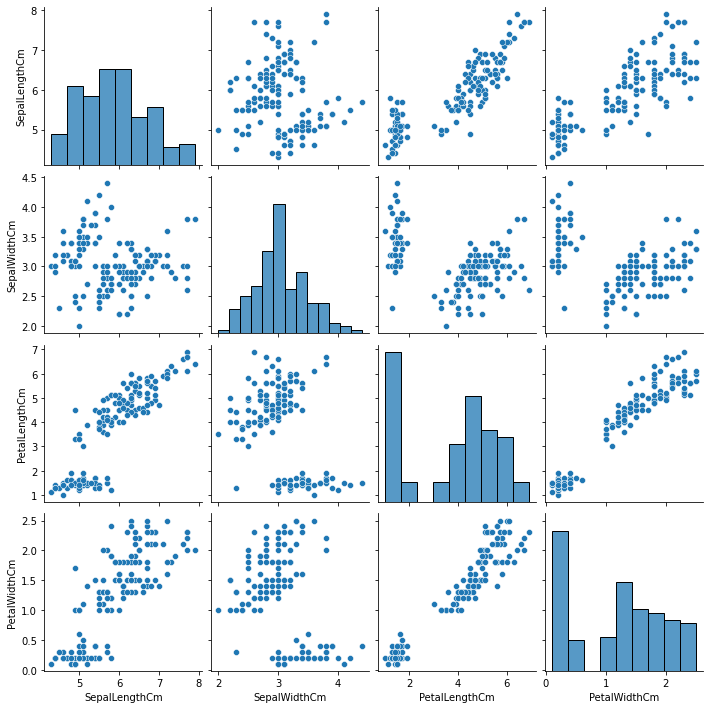

In [7]:
sns.pairplot(data=df)

In [8]:
df = scaler(df)

In [9]:
kmeans = Kmeans(df, 3)

In [10]:
centers = kmeans.get_init_centers_plusplus()

In [11]:
labels, clusters = kmeans.get_final_centers(centers)

In [12]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 2 0 0 2 2 0 0 0
 0 0]


In [13]:
print(clusters)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
130       0.927685      0.795034       0.828039      0.732094
1         0.717076      0.945718      -0.035037     -0.374262
2         1.058137      0.924021       1.144620      1.347011


In [14]:
df_check = pd.read_csv(r'C:\Users\mpiernicki\PycharmProjects\K_Means_Algorithm\DATA\Iris.csv')

In [15]:
df_check.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

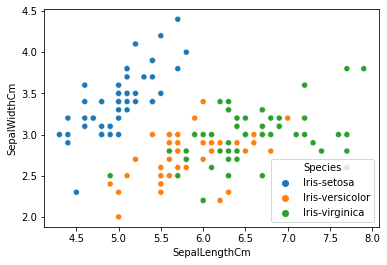

In [16]:
sns.scatterplot(data=df_check,x= 'SepalLengthCm',y= 'SepalWidthCm', hue='Species')

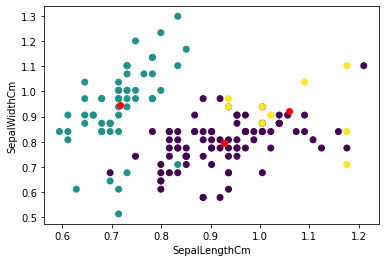

In [17]:
get_2D_graph(df, centers,labels,x_name='SepalLengthCm',y_name='SepalWidthCm')

In [18]:
df['Cluster'] = labels

In [19]:
df['Cluster'].value_counts()

0    86
1    55
2     9
Name: Cluster, dtype: int64

In [20]:
df['Cluster'] = df['Cluster'].apply(lambda x: ('Iris-setosa' if x==0
                             else 'Iris-virginica' if x==1
                             else 'Iris-versicolor'))

In [21]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,0.731078,1.004062,-0.096955,-0.469823,Iris-virginica
1,0.696851,0.840342,-0.096955,-0.469823,Iris-virginica
2,0.662624,0.905830,-0.123560,-0.469823,Iris-virginica
3,0.645511,0.873086,-0.070350,-0.469823,Iris-virginica
4,0.713965,1.036806,-0.096955,-0.469823,Iris-virginica
...,...,...,...,...,...
145,1.004895,0.840342,0.914042,1.282124,Iris-setosa
146,0.936440,0.676623,0.860832,0.948420,Iris-setosa
147,0.970668,0.840342,0.914042,1.031846,Iris-setosa
148,0.919327,0.971318,0.967252,1.282124,Iris-setosa


In [22]:
df['Species'] = df_check['Species']

In [23]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster,Species
0,0.731078,1.004062,-0.096955,-0.469823,Iris-virginica,Iris-setosa
1,0.696851,0.840342,-0.096955,-0.469823,Iris-virginica,Iris-setosa
2,0.662624,0.905830,-0.123560,-0.469823,Iris-virginica,Iris-setosa
3,0.645511,0.873086,-0.070350,-0.469823,Iris-virginica,Iris-setosa
4,0.713965,1.036806,-0.096955,-0.469823,Iris-virginica,Iris-setosa
...,...,...,...,...,...,...
145,1.004895,0.840342,0.914042,1.282124,Iris-setosa,Iris-virginica
146,0.936440,0.676623,0.860832,0.948420,Iris-setosa,Iris-virginica
147,0.970668,0.840342,0.914042,1.031846,Iris-setosa,Iris-virginica
148,0.919327,0.971318,0.967252,1.282124,Iris-setosa,Iris-virginica


In [24]:
conditions = [df['Cluster'] == df['Species'], 
              df['Cluster'] != df['Species']]

choices = [int(1), int(0)]

df['check'] = np.select(conditions, choices, default=1)

In [25]:
df[df['check']==1]['check'].sum()/len(df.index)

0.0

In [26]:
ratio = check_labels(labels,df_check['Species'] )

NameError: name 'check_labels' is not defined

In [ ]:
ratio

In [ ]:
y[label_col_name] = labels

In [ ]:
y = pd.DataFrame(clusters)

In [ ]:
y